In [180]:
import numpy as np
import scipy.signal as sig
import cv2
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from PIL import Image

Markdown(r'# LEC 7: Morphological Image Processing')

# LEC 7: Morphological Image Processing

## Example 1

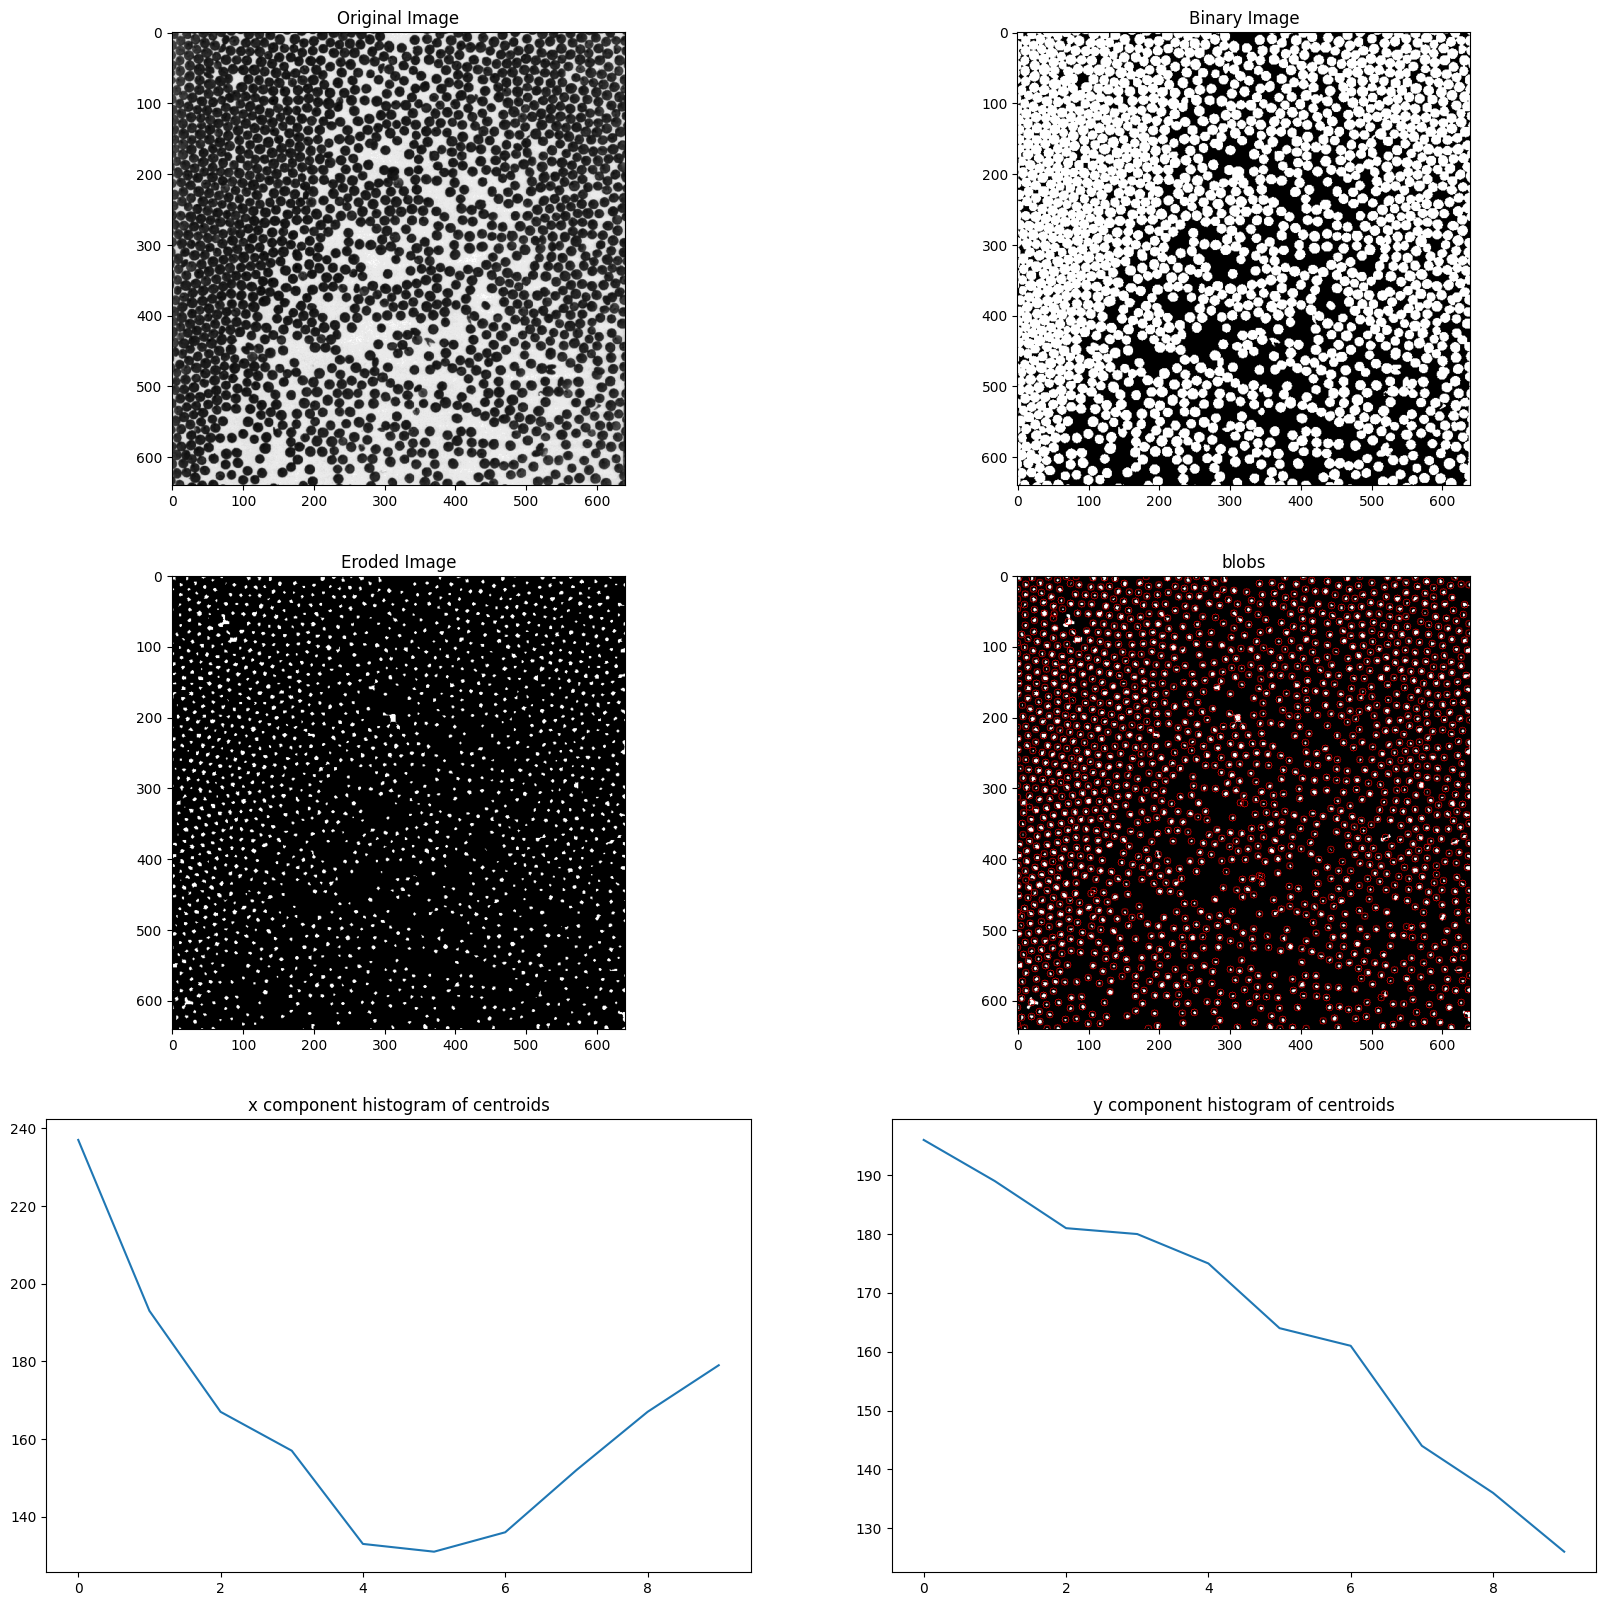

## num. of blobs: 1651

In [181]:
display(Markdown(r'## Example 1'))

def read_gif(path):
    im = Image.open(path)
    images = []
    try:
        while True:
            images.append(np.array(im))
            im.seok(len(images))
    except:
        pass
    return np.array(images)

_, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.flatten()

img = read_gif('balls.gif')[0]
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

thresh, im_bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_bw = ~im_bw
ax[1].imshow(im_bw, cmap='gray')
ax[1].set_title('Binary Image')

k = 10
kernel = np.zeros((k, k), dtype=np.uint8)
structlem = cv2.circle(kernel, (k//2, k//2), k//2, 1, -1)
E = cv2.erode(im_bw, structlem)
ax[2].imshow(E, cmap='gray')
ax[2].set_title('Eroded Image')
#find blobs
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(E, connectivity=8)

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
E = cv2.cvtColor(E, cv2.COLOR_GRAY2RGB)

for k,i in enumerate(centroids):
    E = cv2.circle(E, (int(i[0]), int(i[1])), 5, (255, 0, 0), 1)
ax[3].imshow(E)
ax[3].set_title('blobs')

#x component histogram of centroids
ax[4].plot(np.histogram(centroids[:, 0], bins=10)[0])
ax[4].set_title('x component histogram of centroids')

#y component histogram of centroids
ax[5].plot(np.histogram(centroids[:, 1], bins=10)[0])
ax[5].set_title('y component histogram of centroids')

plt.show()
display(Markdown(r'## num. of blobs: {}'.format(nb_components - 1)))

## Example 2

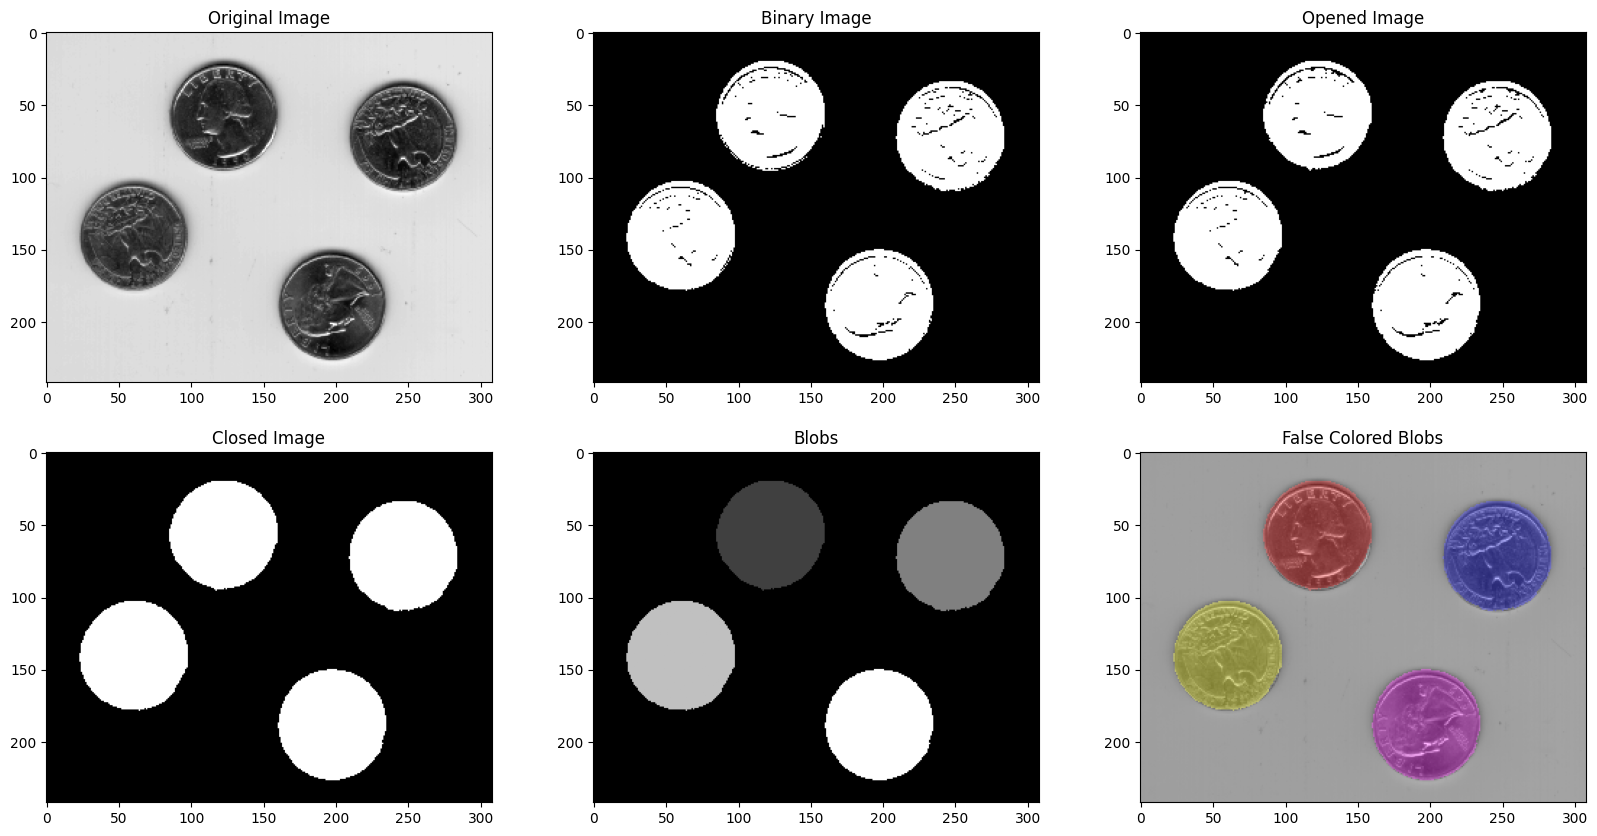

In [182]:
display(Markdown(r'## Example 2'))

import skimage

_, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

img = cv2.imread('eight.tif', cv2.IMREAD_GRAYSCALE)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

thresh, im_bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
im_bw = ~im_bw
ax[1].imshow(im_bw, cmap='gray')
ax[1].set_title('Binary Image')

ok = 3
okernel = np.zeros((ok, ok), dtype=np.uint8)
okernel = cv2.circle(okernel, (ok//2, ok//2), ok//2, 1, -1)

O = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, okernel)
ax[2].imshow(O, cmap='gray')
ax[2].set_title('Opened Image')

ck = 11
ckernel = np.zeros((ck, ck), dtype=np.uint8)
ckernel = cv2.circle(ckernel, (ck//2, ck//2), ck//2, 1, -1)

C = cv2.morphologyEx(O, cv2.MORPH_CLOSE, ckernel)
ax[3].imshow(C, cmap='gray')
ax[3].set_title('Closed Image')

#find blobs
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(C, connectivity=8)

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
C = cv2.cvtColor(C, cv2.COLOR_GRAY2RGB)

ax[4].imshow(output, cmap='gray')
ax[4].set_title('Blobs')

#false colored blobs using skimage
ax[5].imshow(skimage.color.label2rgb(output, bg_label=0, image=img))
ax[5].set_title('False Colored Blobs')

plt.show()

## Example 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


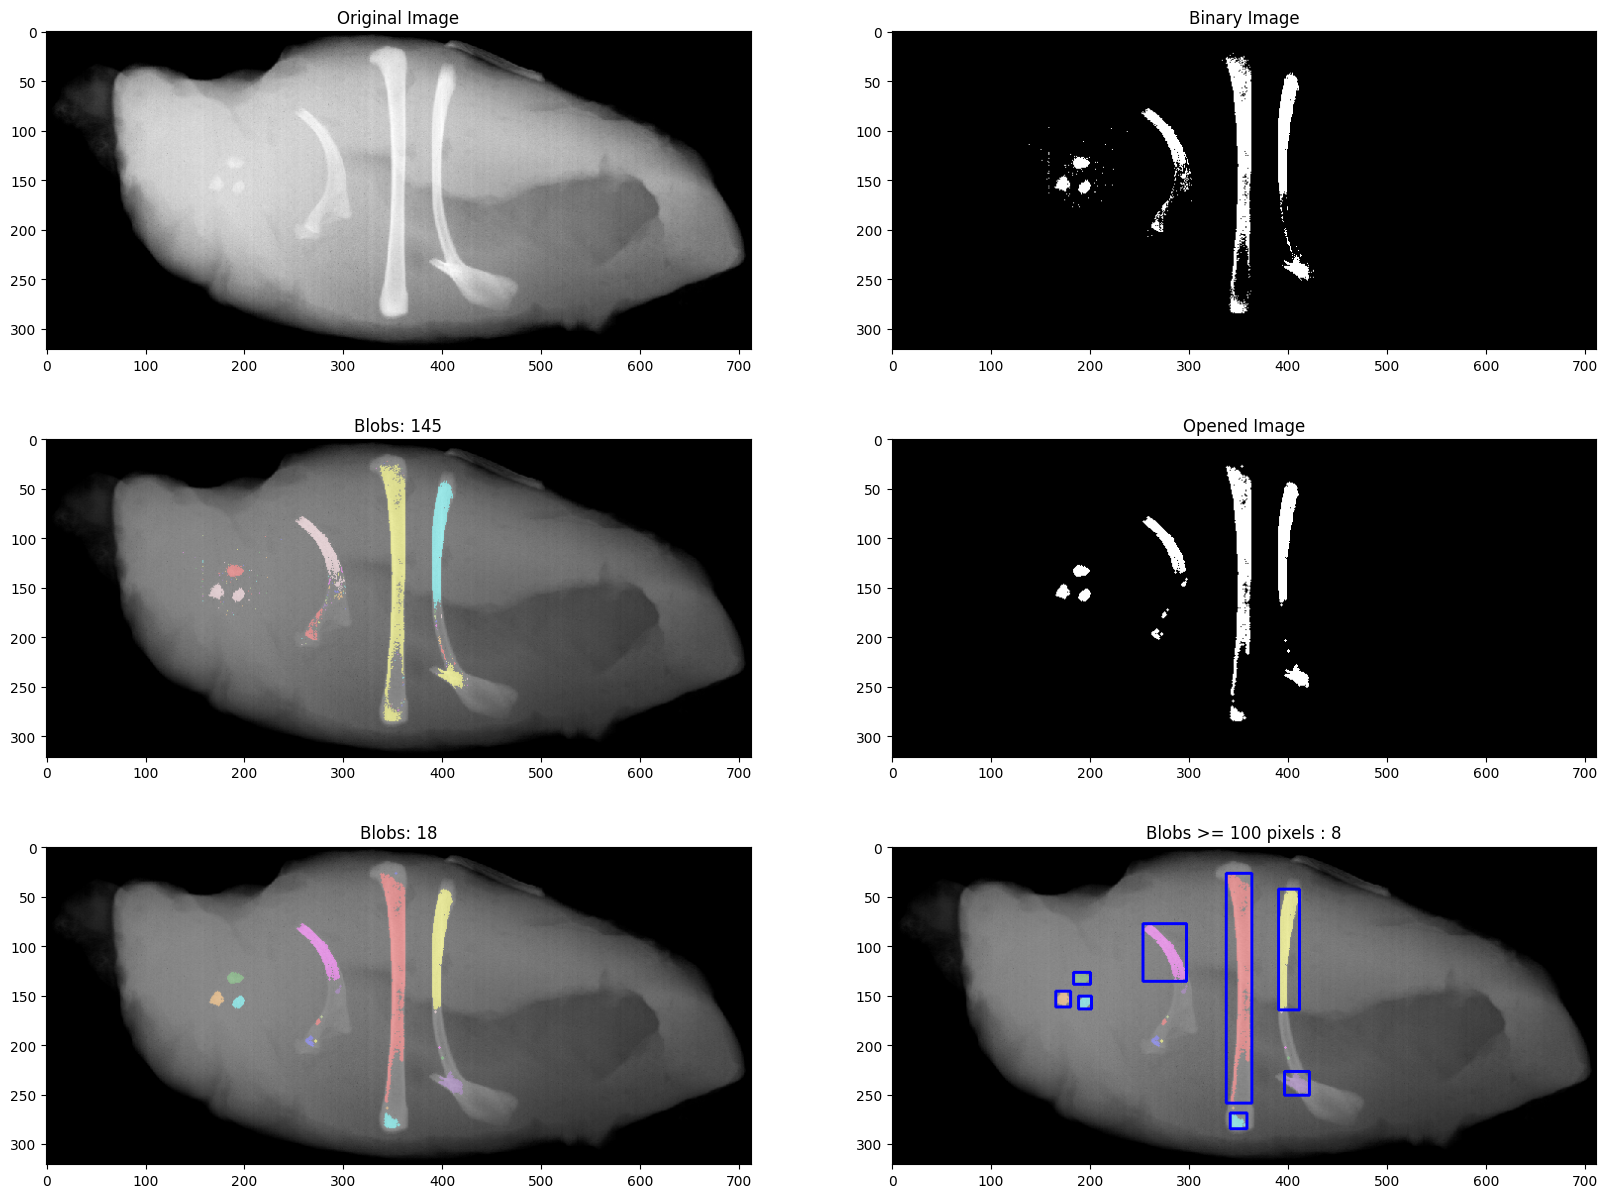

### sum of detected blob areas : 5678 pixels

In [183]:
display(Markdown(r'## Example 3'))

_, ax = plt.subplots(3, 2, figsize=(20, 15))
ax = ax.flatten()

img = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

thresh, im_bw = cv2.threshold(img, 200,  255, cv2.THRESH_BINARY)
ax[1].imshow(im_bw, cmap='gray')
ax[1].set_title('Binary Image')

#find blobs
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im_bw, connectivity=8)
output = skimage.color.label2rgb(output, bg_label=0, image=img)
ax[2].imshow(output)
ax[2].set_title(f'Blobs: {nb_components - 1}')

OK = 3
okernel = np.zeros((OK, OK), dtype=np.uint8)
okernel = cv2.circle(okernel, (OK//2, OK//2), OK//2, 1, -1)
O = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, okernel)

ax[3].imshow(O, cmap='gray')
ax[3].set_title('Opened Image')

#find blobs
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(O, connectivity=8)
output = skimage.color.label2rgb(output, bg_label=0, image=img)
ax[4].imshow(output)
ax[4].set_title(f'Blobs: {nb_components - 1}')

#draw rectangle around blobs >= 100 pixels
n_th  = 0
blob_sums = 0
for i in range(1, nb_components):
    if stats[i, 4] >= 100:
        n_th += 1
        blob_sums += stats[i, 4]
        x, y, w, h = stats[i, 0], stats[i, 1], stats[i, 2], stats[i, 3]
        output = cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 255), 2)

ax[5].imshow(output)
ax[5].set_title(f'Blobs >= 100 pixels : {n_th}')

plt.show()

display(Markdown(r'### sum of detected blob areas : {} pixels'.format(blob_sums)))

## Example 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


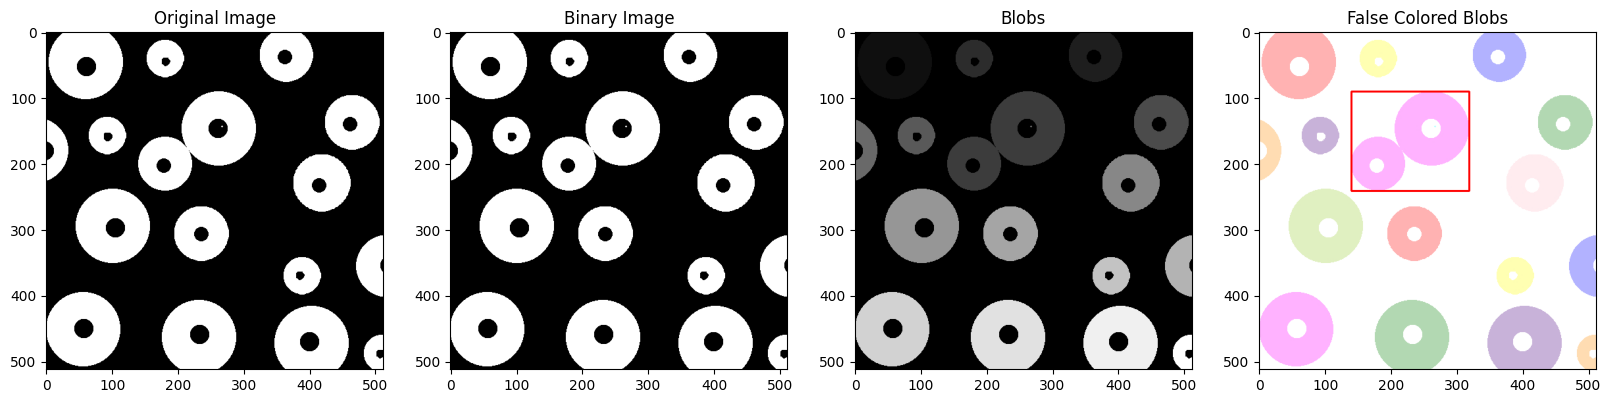

### num. of blobs: 17

In [184]:
display(Markdown(r'## Example 4'))

_, ax = plt.subplots(1, 4, figsize=(20, 5))

img = cv2.imread('Fig9.16(a).jpg', cv2.IMREAD_GRAYSCALE)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')

thresh, im_bw = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
ax[1].imshow(im_bw, cmap='gray')
ax[1].set_title('Binary Image')

#find blobs
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(im_bw, connectivity=8)

img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
im_bw = cv2.cvtColor(im_bw, cv2.COLOR_GRAY2RGB)

ax[2].imshow(output, cmap='gray')
ax[2].set_title('Blobs')

#false colored blobs using skimage and draw a bounding box around biggest blob
fcb = skimage.color.label2rgb(output, bg_label=0, bg_color=(255, 255, 255), image=img)
bigBlob = stats[1:][stats[1:, 4].max() == stats[1:, 4]][0]
fcb = cv2.rectangle(fcb, (bigBlob[0] , bigBlob[1]), (bigBlob[0] + bigBlob[2], bigBlob[1] + bigBlob[3]), (255, 0, 0), 2)
ax[3].imshow(fcb)
ax[3].set_title('False Colored Blobs')
plt.show()

display(Markdown(r'### num. of blobs: {}'.format(nb_components - 1)))